# Predicting heart disease using machine learning
This notebook aims to predict heart diseases with the help of various python-based machine learning models

In [1]:
#Importing all the tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

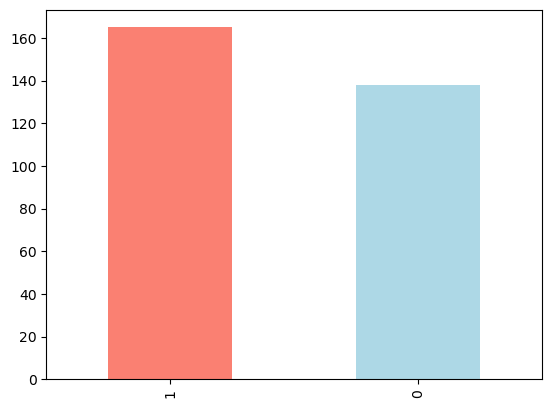

In [5]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [6]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


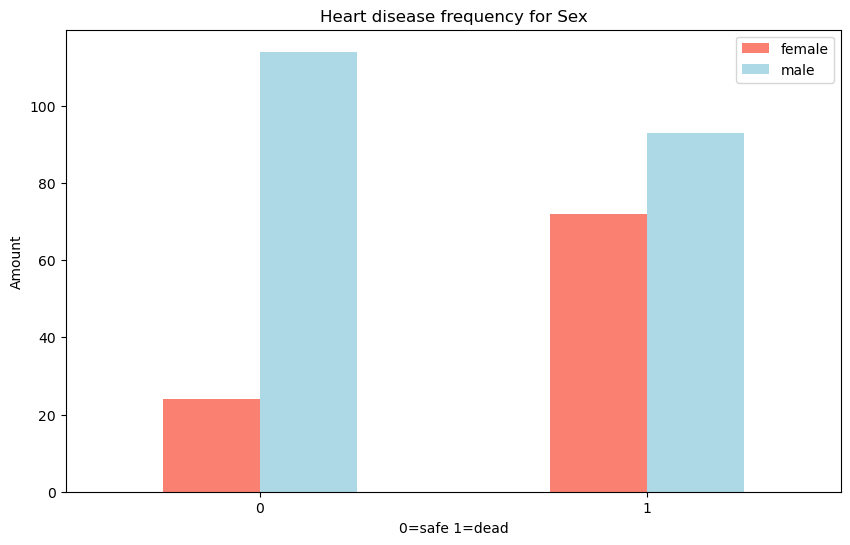

In [7]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart disease frequency for Sex")
plt.xlabel("0=safe 1=dead")
plt.ylabel("Amount")
plt.legend(["female","male"])
plt.xticks(rotation=0);

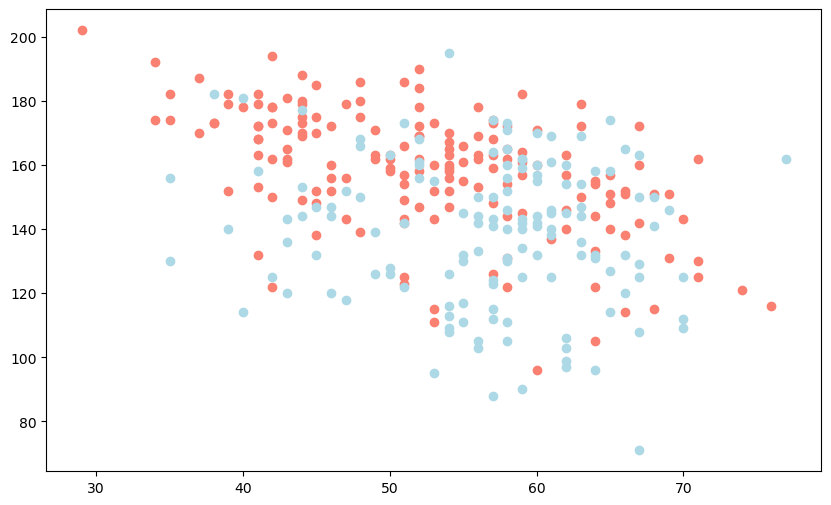

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
           c="salmon")
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")


In [9]:
X=df.drop("target",axis=1)
y=df.target

In [10]:
X


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [11]:
y


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [12]:
np.random.seed(99)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [13]:
models = {"Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest Classifier":RandomForestClassifier()}
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [14]:
model_scores = fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\aniru\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.819672131147541,
 'KNN': 0.6557377049180327,
 'Random Forest Classifier': 0.819672131147541}

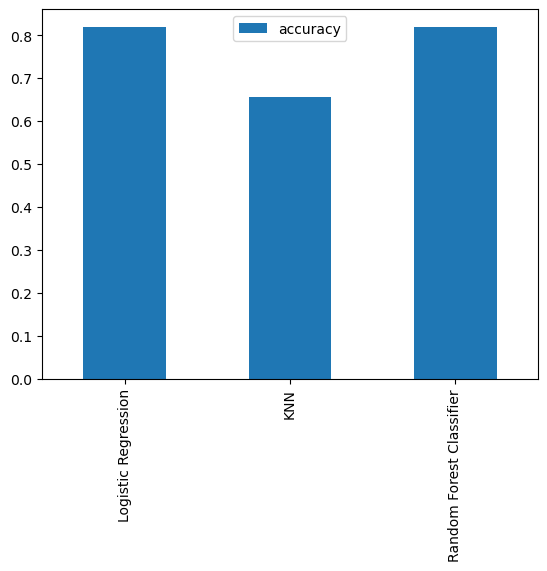

In [15]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

In [16]:
train_scores=[]
test_scores=[]
knn=KNeighborsClassifier()
param=range(1,21)
for i in param:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [17]:
train_scores

[1.0,
 0.8099173553719008,
 0.7933884297520661,
 0.743801652892562,
 0.7603305785123967,
 0.7396694214876033,
 0.7355371900826446,
 0.731404958677686,
 0.7107438016528925,
 0.7148760330578512,
 0.6900826446280992,
 0.7024793388429752,
 0.7107438016528925,
 0.7024793388429752,
 0.7107438016528925,
 0.6983471074380165,
 0.6983471074380165,
 0.6900826446280992,
 0.6818181818181818,
 0.6735537190082644]

In [18]:
test_scores

[0.639344262295082,
 0.5737704918032787,
 0.7049180327868853,
 0.6065573770491803,
 0.6557377049180327,
 0.6721311475409836,
 0.6229508196721312,
 0.6065573770491803,
 0.639344262295082,
 0.6229508196721312,
 0.6557377049180327,
 0.6229508196721312,
 0.639344262295082,
 0.6229508196721312,
 0.6557377049180327,
 0.6065573770491803,
 0.639344262295082,
 0.5901639344262295,
 0.6229508196721312,
 0.5901639344262295]

Maximun Knn score on test data :70.49


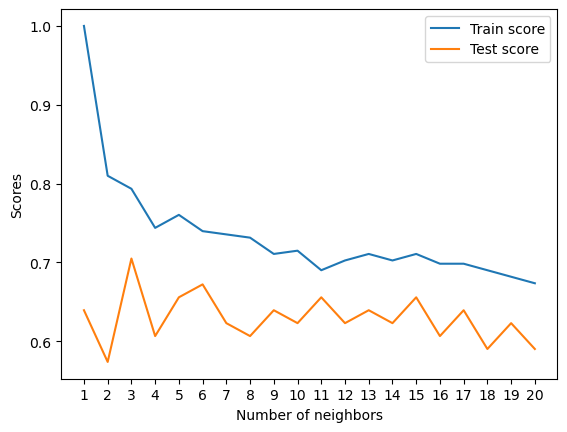

In [19]:
plt.plot(param,train_scores,label="Train score")
plt.plot(param,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Scores")
plt.legend()
print(f"Maximun Knn score on test data :{max(test_scores)*100:.2f}")

In [20]:
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}
rf_grid = {"n_estimators":np.arange(10,1000,50),
            "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

In [21]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [22]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [23]:
rs_log_reg.score(X_test,y_test)

0.8524590163934426

Now we have tuned Logistic Regression(),Now lets continue with RandomForestClassifier()

In [24]:
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                         n_iter=20,
                        verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [25]:
rs_rf.best_params_

{'n_estimators': 460,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_depth': None}

In [26]:
rs_rf.score(X_test,y_test)

0.8852459016393442

In [27]:
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
gs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [28]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [29]:
gs_log_reg.score(X_test,y_test)

0.8524590163934426

## Evalutaing our machine learning classifier

In [30]:
y_preds=rs_rf.predict(X_test)

In [31]:
y_preds

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [32]:
y_test

137    1
262    0
43     1
90     1
32     1
      ..
264    0
40     1
214    0
183    0
6      1
Name: target, Length: 61, dtype: int64

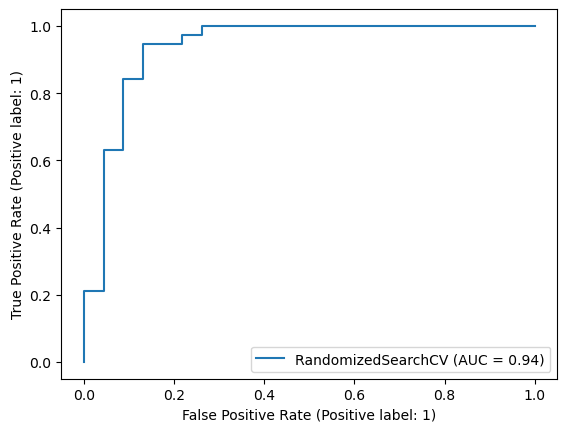

In [33]:
RocCurveDisplay.from_estimator(rs_rf,X_test,y_test)

In [34]:
print(confusion_matrix(y_test,y_preds))

[[20  3]
 [ 4 34]]


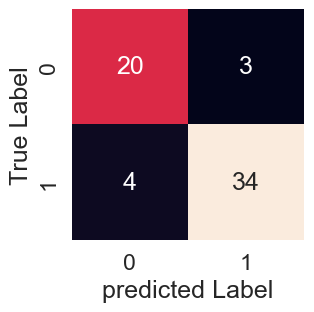

In [35]:
sns.set(font_scale=1.5)
def plot_conf_matrix(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("predicted Label")
    plt.ylabel("True Label")
plot_conf_matrix(y_test,y_preds)

In [36]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.92      0.89      0.91        38

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [37]:
rs_rf.best_params_

{'n_estimators': 460,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_depth': None}

In [38]:
clf = RandomForestClassifier(n_estimators=460,min_samples_split=6,min_samples_leaf=9,max_depth=None)

In [40]:
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.8852459 , 0.81967213, 0.86666667, 0.76666667])

In [43]:
cv_acc=np.mean(cv_acc)
cv_acc

0.831584699453552

In [45]:
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision

array([0.80555556, 0.88235294, 0.84848485, 0.85714286, 0.76315789])

In [46]:
cv_precision=np.mean(cv_precision)
cv_precision

0.8313388194193149

In [48]:
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.8727272727272727

In [50]:
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8469483937529038

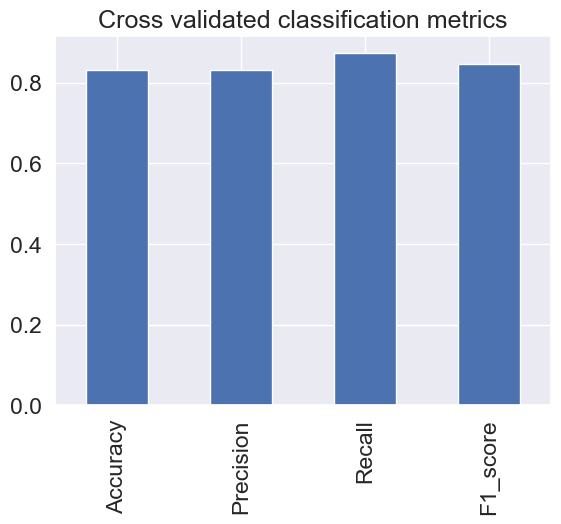

In [51]:
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "F1_score":cv_f1},index=[0])
cv_metrics.T.plot.bar(title="Cross validated classification metrics",legend=False)

In [58]:
rs_log_reg.best_params_
clf = LogisticRegression(C=0.08858667904100823,solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.08858667904100823, solver='liblinear')

In [59]:
clf.coef_

array([[ 0.01947949, -0.52732256,  0.60652001, -0.02280246, -0.00467872,
         0.02409336,  0.28909176,  0.0292718 , -0.28777013, -0.42872972,
         0.2877805 , -0.57528975, -0.48236171]])

In [63]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.019479486719382898,
 'sex': -0.5273225631950602,
 'cp': 0.6065200117792775,
 'trestbps': -0.022802458001016955,
 'chol': -0.004678715956083079,
 'fbs': 0.02409335659134136,
 'restecg': 0.2890917609550052,
 'thalach': 0.029271804788962536,
 'exang': -0.287770131156812,
 'oldpeak': -0.4287297150977623,
 'slope': 0.2877805006214051,
 'ca': -0.5752897453975357,
 'thal': -0.48236171430767755}

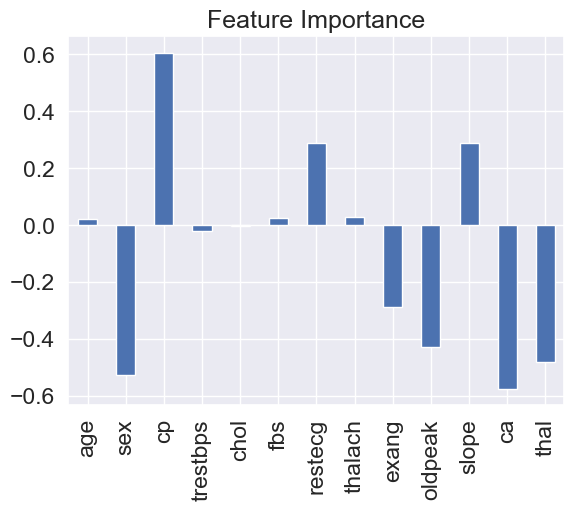

In [65]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);